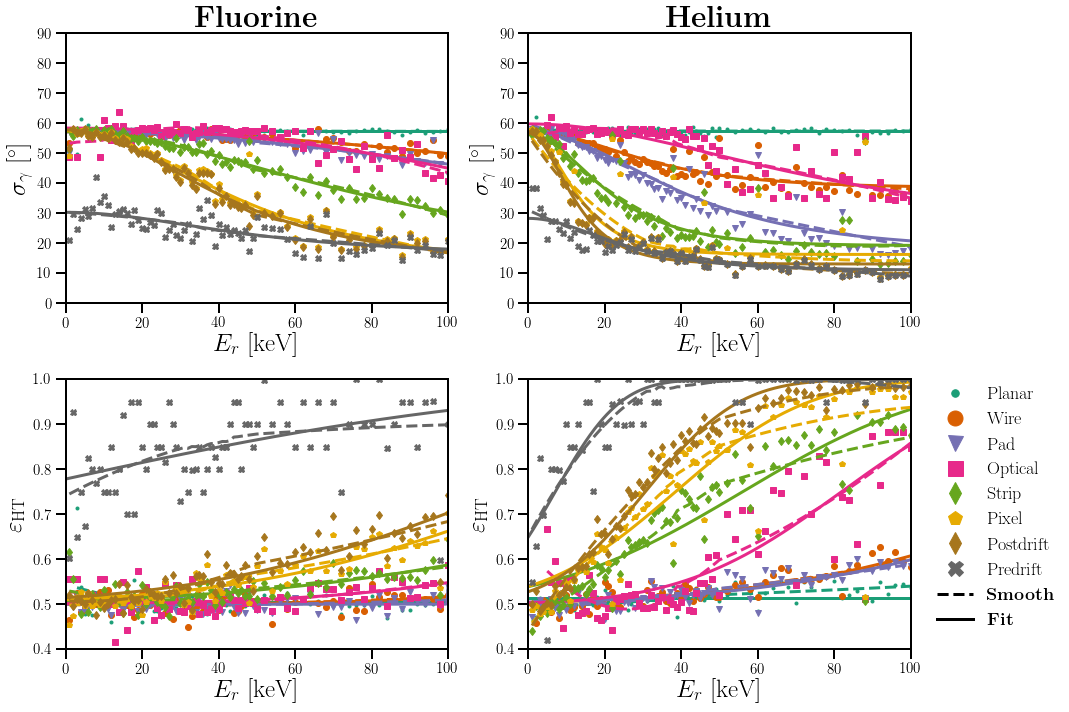

In [51]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.special import erf
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

col = cm.Dark2(linspace(0,1,8))

fig, ax = plt.subplots(2,2)
fig.set_size_inches(13,10)

smooth_w = 61
smooth_i = 2
def headtail_func(z,a,b):
    return 0.25*(erf((z-a)/b)+3);

def angres_func(z,a,b,c):
    return a/cosh(z/c)+b

# Sven's names
readouts = ["" for x in range(0,8)]
readouts[0] = "gem_after_threshold"
readouts[1] = "wir_after_threshold"
readouts[2] = "pad_after_threshold"
readouts[3] = "opt_after_threshold"
readouts[4] = "str_after_threshold"
readouts[5] = "pix_after_threshold"
readouts[6] = "3d_noquant_after_drift"
readouts[7] = "3d_noquant_before_drift"

# My names
froot_ar = "-AngRes.txt"
fdir_ar = "../readouts/angres/"
froot_ht = "-HeadTail.txt"
fdir_ht = "../readouts/headtail/"
fname = ["" for x in range(0,8)]
fname[0] ="Planar"
fname[1] ="Wire"
fname[2] ="Pad"
fname[3] ="Optical"
fname[4] ="Strip"
fname[5] ="Pixel"
fname[6] ="Postdrift"
fname[7] ="Predrift"

nE = 1000
E_max = 100.0
Evals = linspace(0.0, E_max, nE)
mrkz = ['.','o','v','s','d','p','d','X']
for ro_i in range(0,8):
    ro1 = readouts[ro_i]
    filename = fname[ro_i]

    data_ar = zeros(shape=(nE,3))
    data_ht = zeros(shape=(nE,3))
    F_ar = zeros(shape=(75,2))
    F_ht = zeros(shape=(75,2))
    He_ht = zeros(shape=(75,2))
    He_ar = zeros(shape=(75,2))

    f=open('../../angular_performance.txt','r')
    i1 = 0
    i2 = 0
    for line in f:
        a = line.split()
        nuc = a[8]
        ro = a[10]
        if ro==ro1:
            angres = a[11]
            ht = a[12]
            if nuc=='helium':
                He_ar[i1,0] = a[9]
                He_ht[i1,0] = a[9]
                He_ar[i1,1] = angres
                He_ht[i1,1] = ht
                i1 = i1+1
            else:
                F_ar[i2,0] = a[9]
                F_ht[i2,0] = a[9]
                F_ar[i2,1] = angres
                F_ht[i2,1] = ht
                i2 = i2+1
    He_ht = He_ht[0:i1,:]
    He_ar = He_ar[0:i1,:]
    F_ar = F_ar[0:i2,:]
    F_ht = F_ht[0:i2,:]
    if ro_i>0:
        pF,pcov = curve_fit(angres_func,F_ar[:,0], F_ar[:,1])
        pHe,pcov = curve_fit(angres_func,He_ar[:,0], He_ar[:,1])
        data_ar[:,0] = Evals
        data_ar[:,1] = angres_func(Evals,*pF)
        data_ar[:,2] = angres_func(Evals,*pHe)

        pF,pcov = curve_fit(headtail_func,F_ht[:,0], F_ht[:,1])
        pHe,pcov = curve_fit(headtail_func,He_ht[:,0], He_ht[:,1])
        data_ht[:,0] = Evals
        data_ht[:,1] = headtail_func(Evals,*pF)
        data_ht[:,2] = headtail_func(Evals,*pHe)
    else:
        data_ar[:,0] = Evals
        data_ht[:,0] = Evals
        data_ar[:,1] = mean(F_ar[:,1])*ones(shape=(nE))
        data_ar[:,2] = mean(He_ar[:,1])*ones(shape=(nE))
        data_ht[:,1] = mean(F_ht[:,1])*ones(shape=(nE))
        data_ht[:,2] = mean(He_ht[:,1])*ones(shape=(nE))

    plt.sca(ax[0,0])
    y = savgol_filter(F_ar[:,1], smooth_w, smooth_i)
    plt.plot(F_ar[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(F_ar[:,0],F_ar[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    plt.plot(data_ar[:,0],data_ar[:,1],'-',color=col[ro_i,:],linewidth=3)
    plt.title(r"{\bf Fluorine}",fontsize=30)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\sigma_\gamma$ [$^\circ$]",fontsize=25)
    ax[0,0].set_ylim(bottom=0, top=90)
    ax[0,0].set_xlim(0,100)
    ax[0,0].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.sca(ax[0,1])
    y = savgol_filter(He_ar[:,1], smooth_w, smooth_i)
    plt.plot(He_ar[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(He_ar[:,0],He_ar[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    plt.plot(data_ar[:,0],data_ar[:,2],'-',color=col[ro_i,:],linewidth=3)
    plt.title(r"{\bf Helium}",fontsize=30)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\sigma_\gamma$ [$^\circ$]",fontsize=25)
    ax[0,1].set_ylim(bottom=0, top=90)
    ax[0,1].set_xlim(0,100)
    ax[0,1].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.sca(ax[1,0])
    y = savgol_filter(F_ht[:,1], smooth_w, smooth_i)
    plt.plot(F_ht[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(F_ht[:,0],F_ht[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    plt.plot(data_ht[:,0],data_ht[:,1],'-',color=col[ro_i,:],linewidth=3)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\varepsilon_{\rm HT}$",fontsize=25)
    ax[1,0].set_ylim(bottom=0.4, top=1)
    ax[1,0].set_xlim(0,100)
    ax[1,0].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.sca(ax[1,1])
    y = savgol_filter(He_ht[:,1], smooth_w, smooth_i)
    plt.plot(He_ht[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(He_ht[:,0],He_ht[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    plt.plot(data_ht[:,0],data_ht[:,2],'-',color=col[ro_i,:],linewidth=3)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\varepsilon_{\rm HT}$",fontsize=25)
    ax[1,1].set_ylim(bottom=0.4, top=1)
    ax[1,1].set_xlim(0,100)
    ax[1,1].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    f.close()    
   

    
fig.tight_layout()   
plt.sca(ax[1,1])

for i in range(0,8):
    plt.plot(-1,-1,mrkz[i],markersize=15,color=col[i,:],label=fname[i])
plt.plot([-1,-2],[-1,-2],'k--',linewidth=3,label=r'{\bf Smooth}')
plt.plot([-1,-2],[-1,-2],'k-',linewidth=3,label=r'{\bf Fit}')


plt.legend(fontsize=18,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#
fig.savefig('../plots/angular-performance.pdf',bbox_inches='tight')



# Energy performance

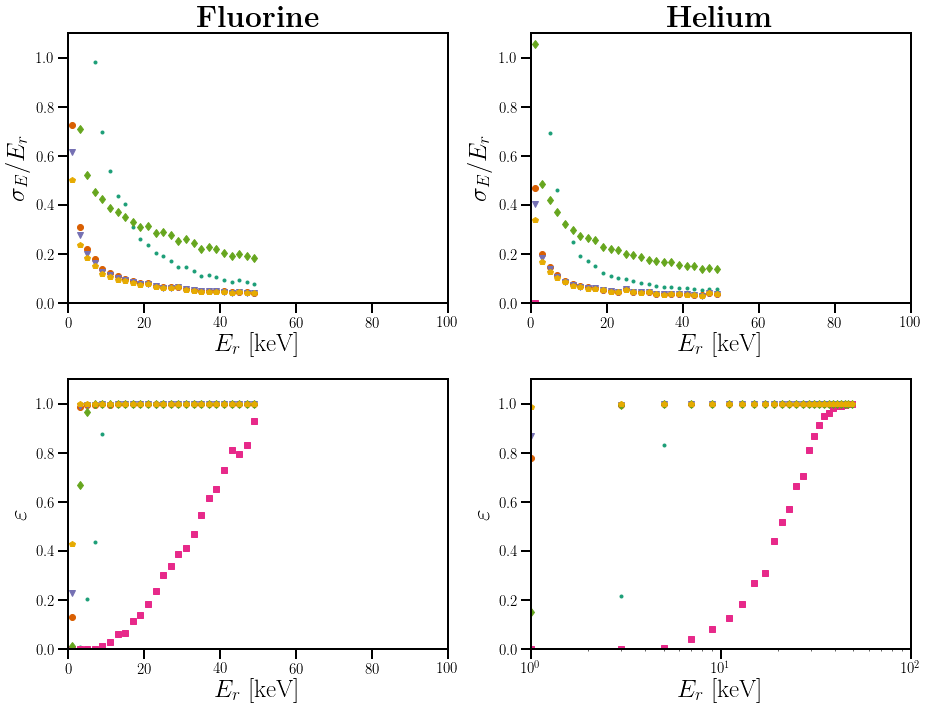

In [58]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.special import erf
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

col = cm.Dark2(linspace(0,1,8))

fig, ax = plt.subplots(2,2)
fig.set_size_inches(13,10)

smooth_w = 11
smooth_i = 2
def eff_func(z,a,b):
    return 0.5*(erf((z-a)/b)+1);

def energyres_func(z,a,b):
    return a/(b*sqrt(z)+1);

mrkz = ['.','o','v','s','d','p']

# Sven's names
readouts = ["" for x in range(0,6)]
readouts[0] = "gem"
readouts[1] = "wir"
readouts[2] = "pad"
readouts[3] = "opt"
readouts[4] = "str"
readouts[5] = "pix"

# My names
froot_er = "-EnergyRes.txt"
fdir_er = "../readouts/energyresolution/"
froot_eff = "-Efficiency.txt"
fdir_eff = "../readouts/efficiency/"
fname = ["" for x in range(0,6)]
fname[0] ="Planar"
fname[1] ="Wire"
fname[2] ="Pad"
fname[3] ="Optical"
fname[4] ="Strip"
fname[5] ="Pixel"

nE = 1000
E_max = 100.0
Evals = linspace(0.0, E_max, nE)

for ro_i in range(0,6):
    ro1 = readouts[ro_i]
    filename = fname[ro_i]

    data_eff = zeros(shape=(nE,3))
    F_eff = zeros(shape=(75,2))
    He_eff = zeros(shape=(75,2))
    f=open('../../Sven_efficiency.txt','r')
    i1 = 0
    i2 = 0
    for line in f:
        a = line.split()
        nuc = a[7]
        ro = a[9]
        if ro==ro1:
            if nuc=='helium':
                He_eff[i1,0] = a[8]
                He_eff[i1,1] = a[10]
                i1 = i1+1
            else:
                F_eff[i2,0] = a[8]
                F_eff[i2,1] = a[10]
                i2 = i2+1              
    He_eff = He_eff[0:i1,:]
    F_eff = F_eff[0:i2,:]
    pF,pcov = curve_fit(eff_func,F_eff[:,0], F_eff[:,1])
    pHe,pcov = curve_fit(eff_func,He_eff[:,0], He_eff[:,1])
    data_eff[:,0] = Evals
    data_eff[:,1] = eff_func(Evals,*pF)
    data_eff[:,2] = eff_func(Evals,*pHe)
    
    
    F_er = zeros(shape=(75,2))
    He_er = zeros(shape=(75,2))
    data_er = zeros(shape=(nE,3))
    f=open('../../Sven_resolution.txt','r')
    i1 = 0
    i2 = 0
    for line in f:
        a = line.split()
        nuc = a[4]
        ro = a[6]
        if ro==ro1:
            if nuc=='helium':
                He_er[i1,0] = a[5]
                He_er[i1,1] = a[7]
                i1 = i1+1
            else:
                F_er[i2,0] = a[5]
                F_er[i2,1] = a[7]
                i2 = i2+1              
    He_er = He_er[0:i1,:]
    F_er = F_er[0:i2,:]
    pF,pcov = curve_fit(energyres_func,F_er[:,0], F_er[:,1])
    pHe,pcov = curve_fit(energyres_func,He_er[:,0], He_er[:,1])
    data_er[:,0] = Evals
    data_er[:,1] = energyres_func(Evals,*pF)
    data_er[:,2] = energyres_func(Evals,*pHe)


    plt.sca(ax[0,0])
    y = savgol_filter(F_er[:,1], smooth_w, smooth_i)
    #plt.plot(F_er[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(F_er[:,0],F_er[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    #plt.plot(data_er[:,0],data_er[:,1],'-',color=col[ro_i,:],linewidth=3)
    plt.title(r"{\bf Fluorine}",fontsize=30)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\sigma_E/E_r$",fontsize=25)
    ax[0,0].set_ylim(bottom=0, top=1.1)
    ax[0,0].set_xlim(0,100)
    ax[0,0].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.sca(ax[0,1])
    y = savgol_filter(He_er[:,1], smooth_w, smooth_i)
    #plt.plot(He_er[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(He_er[:,0],He_er[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    #plt.plot(data_er[:,0],data_er[:,2],'-',color=col[ro_i,:],linewidth=3)
    plt.title(r"{\bf Helium}",fontsize=30)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\sigma_E/E_r$",fontsize=25)
    ax[0,1].set_ylim(bottom=0, top=1.1)
    ax[0,1].set_xlim(0,100)
    ax[0,1].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.sca(ax[1,0])
    y = savgol_filter(He_eff[:,1], smooth_w, smooth_i)
    #plt.plot(F_eff[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(F_eff[:,0],F_eff[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    #plt.plot(data_eff[:,0],data_eff[:,1],'-',color=col[ro_i,:],linewidth=3)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\varepsilon$",fontsize=25)
    ax[1,0].set_ylim(bottom=0, top=1.1)
    ax[1,0].set_xlim(0,100)
    ax[1,0].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.sca(ax[1,1])
    y = savgol_filter(He_eff[:,1], smooth_w, smooth_i)
    #plt.plot(He_eff[:,0],y,'--',linewidth=3,color=col[ro_i,:])
    plt.plot(He_eff[:,0],He_eff[:,1],mrkz[ro_i],color=col[ro_i,:],linewidth=3)
    #plt.plot(data_eff[:,0],data_eff[:,2],'-',color=col[ro_i,:],linewidth=3)
    plt.xlabel(r"$E_r$ [keV]",fontsize=25)
    plt.ylabel(r"$\varepsilon$",fontsize=25)
    ax[1,1].set_ylim(bottom=0, top=1.1)
    ax[1,1].set_xlim(0,100)
    ax[1,1].tick_params(which='major',direction='out',width=2,length=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax[1,1].set_xscale('log')

    
    f.close()    




fig.tight_layout()   
plt.sca(ax[1,1])
plt.legend(fontsize=18,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#
fig.savefig('../plots/energy-performance.pdf',bbox_inches='tight')



In [49]:
shape(He_eff)

(25, 2)

In [35]:
a[7]

'1.3604408574776456'